# 14.2. Variability

The **mean tells us where a histogram balances**. But in almost every histogram we have seen, the values spread out on both sides of the mean. **How far from the mean can they be?** To answer this question, we will develop a measure of **variability** about the mean.

We will start by describing how to calculate the measure. Then we will see why it is a good measure to calculate.


## 14.2.1. The Rough Size of Deviations from Average

For simplicity, we will begin our calculations in the context of a simple array any_numbers consisting of just four values. As you will see, our method will extend easily to any other array of values.

In [4]:
from datascience import *
import numpy as np

any_numbers = make_array(1, 2, 2, 10)

The goal is to measure roughly how far off the numbers are from their average. To do this, we first need the average:

In [5]:
# Step 1. The average.
mean = np.mean(any_numbers)
mean

3.75

Next, let’s find out how far each value is from the mean. These are called the deviations from the average. A “deviation from average” is just a value minus the average. The table calculation_steps displays the results.

In [6]:
# Step 2. The deviations from average. (distance)
deviations = any_numbers - mean
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Average', deviations )
calculation_steps

Value,Deviation from Average
1,-2.75
2,-1.75
2,-1.75
10,6.25


Some of the **deviations** are negative; those correspond to values that are below average. Positive deviations correspond to above-average values.

To calculate roughly how big the deviations are, it is natural to compute the mean of the deviations. But something interesting happens when all the deviations are added together:

In [7]:
sum(deviations)

0.0

The positive deviations exactly cancel out the negative ones. This is true of all lists of numbers, no matter what the histogram of the list looks like: **the sum of the deviations from average is zero**.



Since the sum of the deviations is 0, the mean of the deviations will be 0 as well:

In [8]:
np.mean(deviations)

0.0

Because of this, **the mean of the deviations** is not a useful measure of the size of the deviations. What we really want to know is roughly how big the deviations are, regardless of whether they are positive or negative. So we need a way to eliminate the signs of the deviations.

There are two time-honored ways of losing signs: the **absolute value**, and the **square**. It turns out that taking the square constructs a measure with extremely powerful properties, some of which we will study in this course.

So let’s eliminate the signs by squaring all the deviations. Then we will take the mean of the squares:

In [9]:
# Step 3. The squared deviations from average

squared_deviations = deviations ** 2     ##### python is king!
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations )
calculation_steps

Value,Deviation from Average,Squared Deviations from Average
1,-2.75,7.5625
2,-1.75,3.0625
2,-1.75,3.0625
10,6.25,39.0625


### Variance = the mean squared deviation from average

In [10]:
# Step 4. Variance = the mean squared deviation from average

variance = np.mean(squared_deviations)
variance

13.1875

**Variance**: The mean squared deviation calculated above is called the variance of the values.

While the variance does give us an idea of spread, it is not on the same scale as the original variable as its units are the square of the original. This makes interpretation very difficult.

So we return to the original scale by taking the positive square root of the variance:

In [11]:
# Step 5.
# Standard Deviation:    root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1

sd = variance ** 0.5
sd

3.6314597615834874

## 14.2.2. Standard Deviation

The quantity that we have just computed is called the standard deviation of the list, and is abbreviated as SD. It measures roughly how far the numbers on the list are from their average.

**Definition**. The SD of a list is defined as the **root mean square of deviations from average**. That’s a mouthful. But read it from right to left and you have the sequence of steps in the calculation.

**Computation**. The five steps described above result in the SD. You can also use the function np.std to compute the SD of values in an array:

In [12]:
np.std(any_numbers)

3.6314597615834874

What we have observed for the heights and ages is true in great generality. For all lists, the bulk of the entries are no more than 2 or 3 SDs away from the average.

## 14.2.3. Working with the SD

- What can we learn from SD? ::
- The table nba13 contains data on the players in the National Basketball Association (NBA) in 2013. For each player, the table records the position at which the player usually played, his height in inches, his weight in pounds, and his age in years.

In [13]:
path_data = '../../data/'
nba13 = Table.read_table(path_data + 'nba2013.csv')
nba13.show(5)

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26


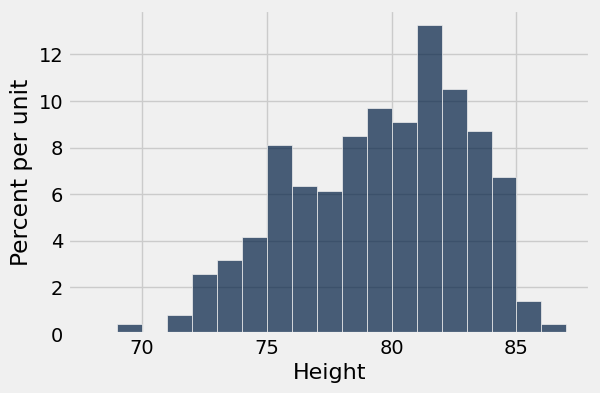

In [14]:
### histogram of heights
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

##### use blue hist
# nba13.select('Height').hist(bins = np.arange(68, 88, 1))
nba13.hist('Height', bins=np.arange(68, 88, 1))

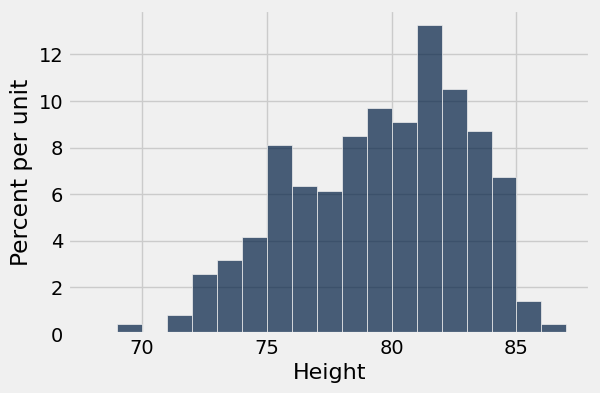

In [15]:
##### use the datascience hist() ... same thing
nba13.select('Height').hist(bins = np.arange(68, 88, 1))

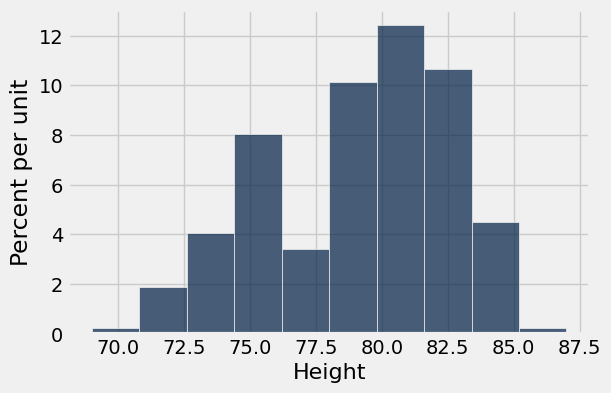

In [16]:
nba13.column('Height')  ### returns an array

##### get bins numbers
nba13.column('Height').max()  ### get max: 87
nba13.column('Height').min()  ### get max: 69

##### average height
nba13.column('Height').mean()   ### 79.065346534653472
# nba13.column('Height').average()   ### AttributeError: 'numpy.ndarray' object has no attribute 'average'

##### heuristics

nba13.hist('Height')

In [17]:
### who is the tallest?
nba13.sort('Height', descending = True).show(3)   ### 87
# nba13.column('Height').max()  ### get max: 87 ### but sometimes we need the whole row

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Alex Len,Center,85,255,20


In [18]:
### mean height:
# nba13.column('Height').mean()   ### 79
mean_height = nba13.column('Height').mean()
mean_height

79.065346534653472

In [19]:
### SD
sd_height = np.std(nba13.column('Height'))
sd_height     ### 3.4505971830275546

3.4505971830275546

In [20]:
### how may SD is the tallest player's deviation from SD?

(nba13.column('Height').max() - nba13.column('Height').mean()) / sd_height

2.2995015194397923

In [21]:
nba13.sort('Height', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Alex Len,Center,85,255,20


In [22]:
(87 - mean_height)/sd_height

2.2995015194397923

In [23]:
### shortest player number deviation from SD

(nba13.column('Height').min() - mean_height) / sd_height

### this is an example of why the SD is a useful measure of spread. No matter 
### what the shape of the histogram, the average and the SD together tell you 
### a lot about where the histogram is situated on the number line.

-2.9169868288775844

In [24]:
nba13.sort('Height', descending=False).show(3)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24
Nate Robinson,Guard,69,180,29
John Lucas III,Guard,71,157,30


In [25]:
(69 - mean_height) / sd_height

-2.9169868288775844

## 14.2.4. First main reason for measuring spread by the SD

- Informal statement. **In all numerical data sets, the bulk of the entries are within the range “average +- a few SDs”**.
- We have already seen that all of the heights of the NBA players were in the range “average 
 3 SDs”.
- What about the ages? Here is a histogram of the distribution, along with the mean and SD of the ages.

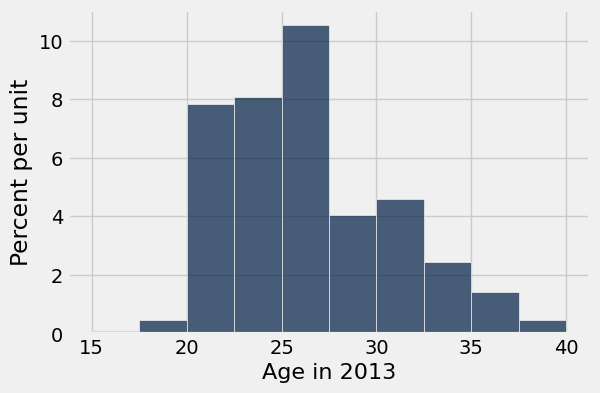

In [26]:
nba13.hist('Age in 2013')

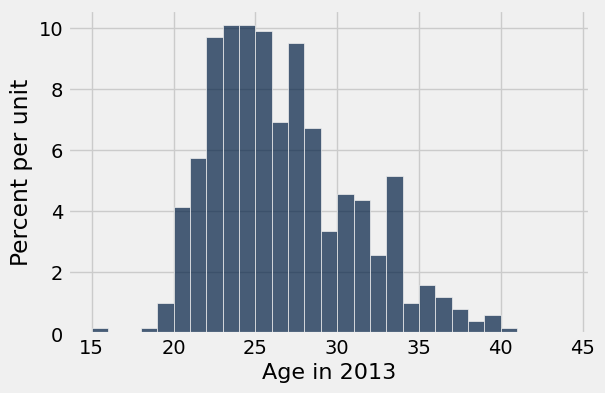

In [27]:
nba13.hist('Age in 2013', bins=np.arange(15, 45, 1))

### let's take a look at scipy describe()

In [28]:
### scipy
from scipy import stats

### import numpy
import numpy as np
import pandas as pd

# stats.describe(pd.DataFrame(nba13))
# pd.DataFrame(nba13)   ### doesn't work
nba_df = nba13.to_df()
nba_df

,Name,Position,Height,Weight,Age in 2013
0,DeQuan Jones,Guard,80,221,23
1,Darius Miller,Guard,80,235,23
2,Trevor Ariza,Guard,80,210,28
3,James Jones,Guard,80,215,32
4,Wesley Johnson,Guard,79,215,26
...,...,...,...,...,...
500,Joel Anthony,Center,81,245,31
501,Bismack Biyombo,Center,81,229,21
502,Luis Scola,Center,81,245,33
503,Lavoy Allen,Center,81,225,24


In [29]:
type(nba_df)

pandas.core.frame.DataFrame

In [30]:
from scipy import stats
nba_df.describe()       ##### works
# pd.describe(nba_df)     ### doesn't work
# stats.describe(nba_df)    ### doesn't work

#####
##### descriptive stats should give us the bins
#####

,Height,Weight,Age in 2013
count,505.000000,505.000000,505.000000
mean,79.065347,220.673267,26.190099
std,3.454019,26.643110,4.325485
min,69.000000,157.000000,15.000000
25%,76.000000,200.000000,23.000000
50%,80.000000,220.000000,25.000000
75%,82.000000,240.000000,29.000000
max,87.000000,290.000000,40.000000


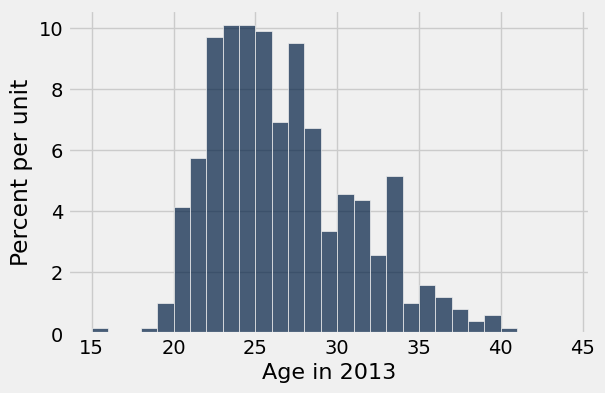

In [31]:
# nba13.hist('Age in 2013', bins = np.arange(14, 41, 1))
nba13.hist('Age in 2013', bins = np.arange(15, 45, 1))

In [32]:
##### mean age and SD age


# mean_age = ages.mean()
# np.std(mean_age)

ages = nba13.column('Age in 2013')
mean_age = np.mean(ages)   ### mean
sd_age = np.std(ages)      ### SD
ages.mean(), np.std(ages)

(26.19009900990099, 4.3212004417203067)

In [33]:
### observe one case: Juwan Howard's age

nba13.where('Name', are.containing('Juwan Howard'))

Name,Position,Height,Weight,Age in 2013
Juwan Howard,Forward,81,250,40


In [34]:
nba13.sort('Age in 2013', descending=True).show(2)

Name,Position,Height,Weight,Age in 2013
Juwan Howard,Forward,81,250,40
Steve Nash,Guard,75,178,39


In [35]:
# nba13.where('Name', are.containing('Juwan Howard'))[4][0] 
oldest = nba13.where('Name', are.containing('Juwan Howard'))[4][0] 
oldest

40

In [74]:
# (nba13.where('Name', are.containing('Juwan Howard'))[4] - mean_age) / sd_age  ### array
# type((nba13.where('Name', are.containing('Juwan Howard'))[4][0] - mean_age) / sd_age) ### float
(nba13.where('Name', are.containing('Juwan Howard'))[4][0] - mean_age) / sd_age

3.1958482778922357

In [37]:
##### now let's add a column to the table: SD to mean

nba13.with_column('SD Age', ((nba13.column(('Age in 2013'))) - mean_age) / sd_age).sort('Age in 2013')


Name,Position,Height,Weight,Age in 2013,SD Age
Jarvis Varnado,Forward,81,230,15,-2.58958
Giannis Antetokounmpo,Forward,81,205,18,-1.89533
Sergey Karasev,Guard,79,197,19,-1.66391
Archie Goodwin,Guard,77,189,19,-1.66391
Livio Jean-Charles,Forward,81,217,19,-1.66391
Michael Kidd-Gilchrist,Forward,79,232,19,-1.66391
Nerlens Noel,Center,82,228,19,-1.66391
Evan Fournier,Guard,79,206,20,-1.4325
Shabazz Muhammad,Guard,78,225,20,-1.4325
Kentavious Caldwell-Pope,Guard,78,205,20,-1.4325


In [38]:
nba_sd_age= nba13.with_column('SD Age', ((nba13.column(('Age in 2013'))) - mean_age) / sd_age).sort('Age in 2013')

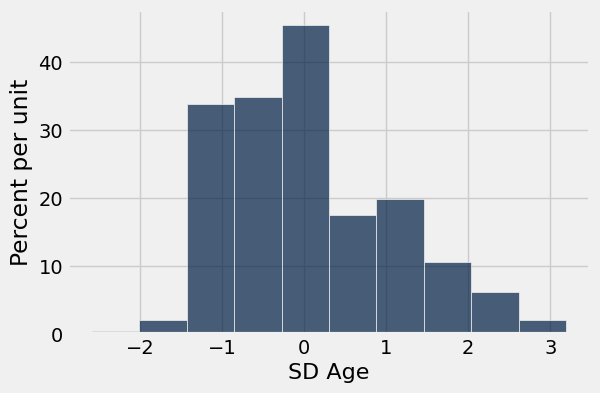

In [39]:
##### there is a distribution in standard units
nba_sd_age.select('SD Age').hist()

In [40]:
##### count +- 2SD / all
np.count_nonzero(nba_sd_age.column('SD Age') > 2)

24

In [41]:
##### count +- 2SD / all
np.count_nonzero(nba_sd_age.column('SD Age') < -2)

1

In [42]:
##### SD > 2 && SD < -2 / all
(np.count_nonzero(nba_sd_age.column('SD Age') > 2) + 
    np.count_nonzero(nba_sd_age.column('SD Age') < -2)) / np.count_nonzero(nba_sd_age)

4.166666666666667

#### but what does 4.1666 mean?

## 14.2.5. Chebychev’s Bounds

The Russian mathematician Pafnuty Chebychev (1821-1894) proved a result that makes our rough statements precise.

For all lists, and all numbers z, the proportion of entries that are in the range “**average 
 +-z SDs” is at least 1 - 1/(z)^2**.

It is important to note that the result gives a bound, not an exact value or an approximation.

What makes the result powerful is that it is true for all lists – all distributions, no matter how irregular.

Specifically, it says that for every list:

- the proportion in the range “average **+- 2 SDs**” is at least **1 - 1/4 = 0.75**
- the proportion in the range “average **+- 3 SDs**” is at least **1 - 1/9 =~ 0.89**
- the proportion in the range “average **+- 4.5 SDs**” is at least **1 - 1/(4/5)^2 =~ 0.95**

- As we noted above, Chebychev’s result gives a **lower bound**, not an exact answer or an approximation. For example, the percent of entries in the range “average +- 2 SDs” might be quite a bit larger than 75%. But it cannot be smaller.

- According to [Wikipeida](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality): Chebyshev's ineuality provides an *upper bound* on the probability of deviation of a random variable (with finite variance) from its mean. More specifically, the probability that a random variable deviates from its mean by more than kσ is at most 1/k**2, where k is any positive constant and σ is the standard deviation (the square root of the variance).
- Its practical usage is similar to the 68–95–99.7 rule, which applies only to normal distributions. Chebyshev's inequality is more general, stating that a minimum of just 75% of values must lie within two standard deviations of the mean and 88.89% within three standard deviations for a broad range of different probability distributions


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [44]:
##### define a function for Chebychev's bounds

def chebyshev_inequality(k):
    return 1 - (1/k**2)

In [45]:
chebyshev_inequality(3)

0.8888888888888888

In [46]:
chebyshev_inequality(3)

0.8888888888888888

In [47]:
chebyshev_inequality(4)

0.9375

In [48]:
chebyshev_inequality(5)

0.96

In [49]:
chebyshev_inequality(6)

0.9722222222222222

In [50]:
chebyshev_inequality(7)

0.9795918367346939

In [51]:
##### normal distribution
k = nba13.column('Age in 2013')
p_norm = np.zeros(len(k))
for i in range(len(k)):
    p_norm[i] = (1 - norm.cdf(k[i])) * 2

p_norm

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [52]:
 9.75 + 1.87 * 3 , 9.85 - 1.87 * 3

(15.36, 4.239999999999999)

## 14.2.6. Standard units

- *z* score is the *standard unit*: The number of standard devations above average.
- no matter what the distribution of the list looks like, Chebychev’s bounds imply that standard units will typically be in the (-5, 5) range.
- **original score to standard units: z = ( value - average ) / SD**

In [53]:
### converting to SD

def standard_units(numbers_array):
    """ Convert any array of numbers to standard units. """
    return (numbers_array - np.mean(numbers_array)) / np.std(numbers_array) ### an z-score array 

## 14.2.7. Example

In [54]:
united = Table.read_table(path_data + 'united_summer2015.csv')   ### flight delays
united.show(5)

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64


In [55]:
# united.sort('Delay', descending=True).show(3)

# united.show(3)
# united.where('Delay', are.max(

In [56]:
united = united.with_column(
    'Delay (Standard Units)', 
    standard_units(united.column('Delay'))
)
united.sort('Delay', descending=True).show(5)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788


In [57]:
united.sort('Delay', descending=True).show(10)   ##### sort

### very extreme values do exist!!!!!!! albeit Chebychev/s bounds

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979


In [58]:
##### Chebychev's inequality
### Chebychev: +-3 SD =~ 89%

within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows / united.num_rows

0.9790235081374322

In [59]:
#### meaning this many percent of flights are delayed more than 3SD or less than -3SD

(1 - within_3_sd.num_rows / united.num_rows) * 100

2.097649186256778

In [60]:
# united_df = united.to_df()
# united_df.describe()
united.to_df().describe()

,Flight Number,Delay,Delay (Standard Units)
count,13825.000000,13825.000000,13825.000000
mean,1133.415045,16.658156,0.000000
std,571.858597,39.481628,1.000036
min,3.000000,-16.000000,-0.827203
25%,591.000000,-2.000000,-0.472595
50%,1178.000000,2.000000,-0.371279
75%,1670.000000,18.000000,0.033988
max,2117.000000,580.000000,14.268971


In [61]:
### max z-score
(united.column('Delay').max() - united.column('Delay').mean()) / united.column('Delay').std()

14.268971449030445

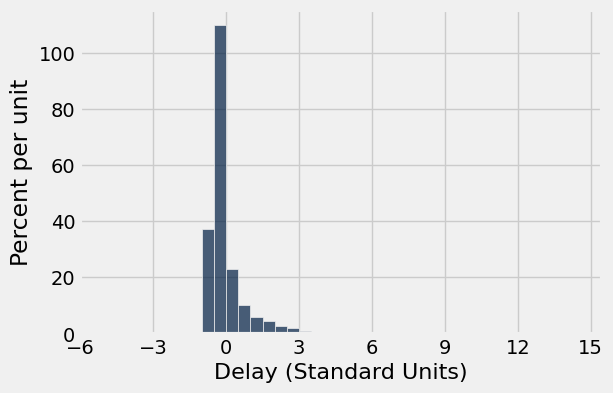

In [62]:
### hwo about the distribution of z-scores?
##### they don't vary much even there are extreme values like 14+

united.select('Delay (Standard Units)').hist(bins = np.arange(-5, 15, 0.5))
plt.xticks(np.arange(-6, 17, 3));